<a href="https://colab.research.google.com/github/emrangel/30daysR/blob/main/Python_d%C3%ADa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python día 1

Este es el primero de 3 ejercicios que replican el esfuerzo de [Aman Kharwal](https://thecleverprogrammer.com/2020/05/08/birth-rate-analysis/), espero que sea de ayuda para algunos que como yo están empezando en el mundo de la programación y los datos

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/amankharwal/Birthrate-Analysis/master/births.csv'
births = pd.read_csv(url) 
print(births.head)
births['day'].fillna(0, inplace=True) 
births['day'] = births['day'].astype(int)
births.dtypes
births.isnull().sum()

Vamos paso a paso para entender todo el código:



1.   Importamos la librería pandas 
2.   El archivo que usamos esta en la plataforma de Github por lo que a "url" le ponemos el path o Url
3. Luego leemos el csv (url)
4. is.null().sum = Suma todos los valores nulos que tiene cada columna o variable
5. df.head le muestra los primeros datos de su dataframe si (5) le mostrara los primeros 5
6. [] selecciona la variable a transformar y .fillna(0, inplace=True) elimina todos los valores nulos
7. luego cambiamos el tipo de datos que es la variable ya que trabajamos con números.



In [ ]:
births.shape

In [ ]:
births['decade'] = 10 * (births['year'] // 10)
tb=births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births)
tb

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
birth_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum') 
birth_decade.plot() 
plt.ylabel("Total births per year") 
plt.xlabel("Decade")
plt.show()

In [ ]:
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
print(births)

In [ ]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

births()

In [ ]:
print("🔁 Restarting kernel...")
get_ipython().kernel.do_shutdown(True)

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
prof = ProfileReport(births,title="teo")
prof
#prof.to_file(output_file='output.html')

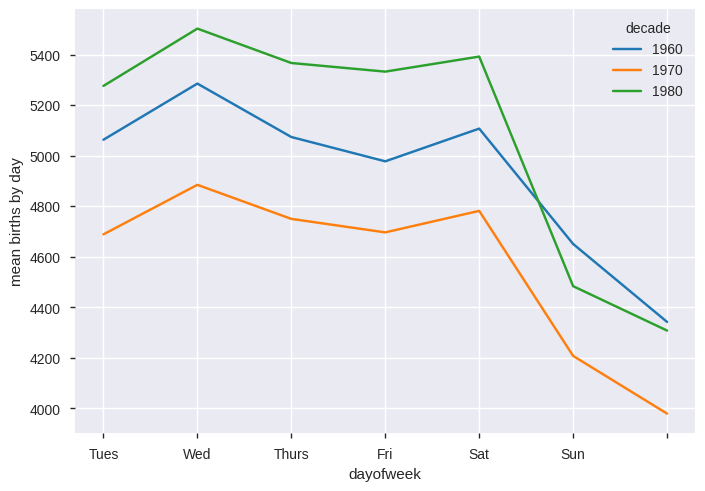

In [ ]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

In [ ]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625


In [ ]:
births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


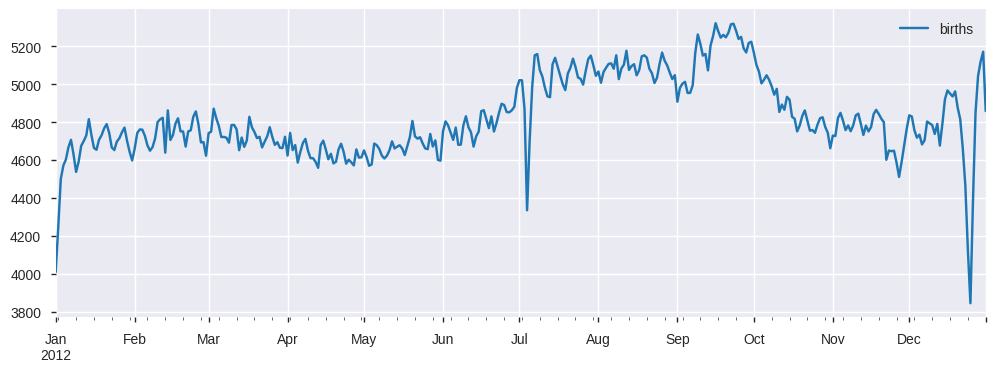

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()